In [31]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import os

%matplotlib inline

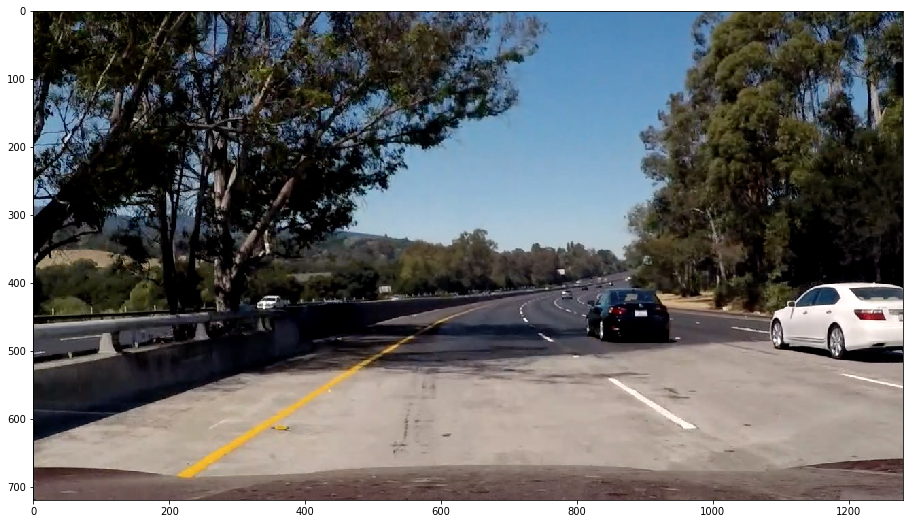

In [32]:
img = cv2.imread('color-shadow-example.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 9))
plt.imshow(img)

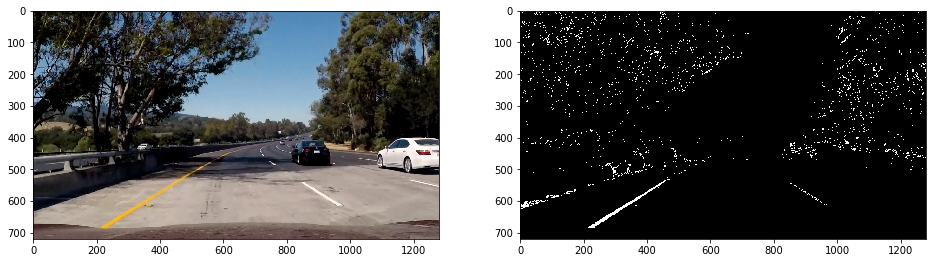

In [33]:
def mask_s_channel(img, threshold=(170, 255)):
    s = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)[...,2]
    mask = np.zeros_like(s)
    mask[(s>threshold[0])&(s<threshold[1])] = 1
    return mask

# threshold = (170, 255)
s_mask = mask_s_channel(img)

plt.figure(figsize=(16, 9))
plt.subplot(1 ,2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(s_mask, 'gray')

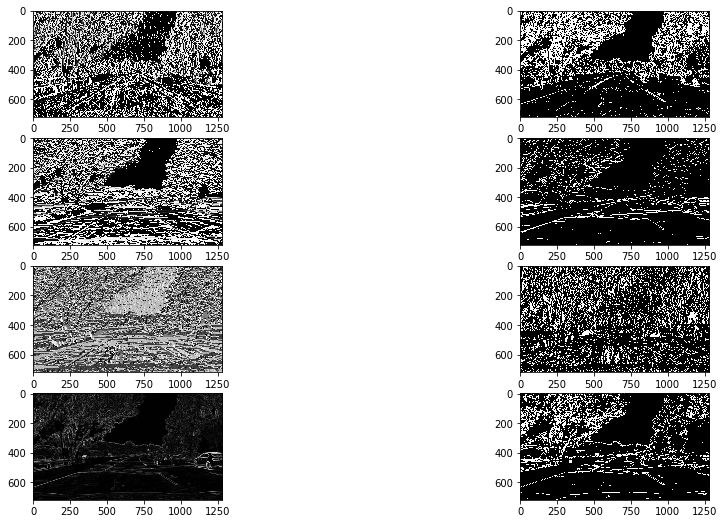

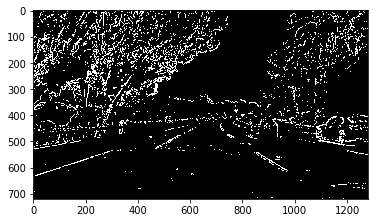

In [52]:
def mask_gradient(img, threshold_x=(20, 250), 
             threshold_y=(20, 200), 
             threshold_angle=(-1, 1), 
             threshold_mag=(30, 100)):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=9)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=9)
    grad_angle = np.arctan2(grad_y, grad_x)
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    grad_x = np.uint8(255 * grad_x / grad_x.max())
    grad_y = np.uint8(255 * grad_y / grad_y.max())
    grad_mag = np.uint8(255 * grad_mag / grad_mag.max())
    
    mask_x, mask_y, mask_angle, mask_mag = \
        np.zeros_like(grad_x), np.zeros_like(grad_y), np.zeros_like(grad_angle), np.zeros_like(grad_mag)
    mask_x[(grad_x>threshold_x[0])&(grad_x<threshold_x[1])] = 1
    mask_y[(grad_y>threshold_y[0])&(grad_y<threshold_y[1])] = 1
    mask_angle[(grad_angle>threshold_angle[0])&(grad_angle<threshold_angle[1])] = 1
    mask_mag[(grad_mag>threshold_mag[0])&(grad_mag<threshold_mag[1])] = 1
    
    mask_combined = np.zeros_like(grad_x)
    mask_combined[((mask_x == 1) & (mask_y == 1)) | ((mask_mag == 1) & (mask_angle == 1))] = 1 
    
    return mask_combined, mask_x, mask_y, mask_angle, mask_mag, grad_x, grad_y, grad_angle, grad_mag

mask_combined, mask_x, mask_y, mask_angle, mask_mag, grad_x, grad_y, grad_angle, grad_mag = mask_gradient(img)
plt.figure(figsize=(16, 9))
plt.subplot(4, 2, 1)
plt.imshow(grad_x, 'gray')
plt.subplot(4, 2, 2)
plt.imshow(mask_x, 'gray')
plt.subplot(4, 2, 3)
plt.imshow(grad_y, 'gray')
plt.subplot(4, 2, 4)
plt.imshow(mask_y, 'gray')
plt.subplot(4, 2, 5)
plt.imshow(grad_angle, 'gray')
plt.subplot(4, 2, 6)
plt.imshow(mask_angle, 'gray')
plt.subplot(4, 2, 7)
plt.imshow(grad_mag, 'gray')
plt.subplot(4, 2, 8)
plt.imshow(mask_mag, 'gray')
plt.show()

plt.imshow(mask_combined, 'gray')
plt.show()

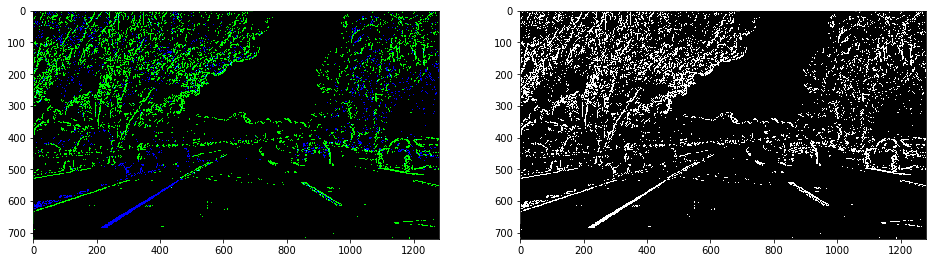

In [53]:
def mask_gradient_HLS(img):
    mask_grad = mask_gradient(img)[0]
    mask_s = mask_s_channel(img)
    mask_combined = np.dstack([np.zeros_like(mask_grad), mask_grad * 255, mask_s * 255])
    mask_combined_gray = np.zeros_like(mask_grad)
    mask_combined_gray[(mask_grad==1) | (mask_s==1)] = 255
    
    return mask_combined, mask_combined_gray

mask_combined, mask_combined_gray = mask_gradient_HLS(img)
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
plt.imshow(mask_combined)
plt.subplot(1, 2, 2)
plt.imshow(mask_combined_gray, 'gray')

In [54]:
mask_grad.max()

1